In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    precision_score,
    recall_score,
    )
%matplotlib inline
import joblib

In [ ]:
df = pd.read_csv('5min_normalizado.csv')
X = df[['rr_mean_boxcox','sdrr_boxcox','sdsd_boxcox','dam_boxcox','vlf_boxcox','lf_boxcox','lfhf_boxcox','sd2_boxcox','sd12_boxcox',
        'lmax_boxcox','captura_boxcox','determinismo_boxcox','rec_yj']]
y = df['etiqueta']

In [ ]:
X.head()

,rr_mean_boxcox,sdrr_boxcox,sdsd_boxcox,dam_boxcox,vlf_boxcox,lf_boxcox,lfhf_boxcox,sd2_boxcox,sd12_boxcox,lmax_boxcox,captura_boxcox,determinismo_boxcox,rec_yj
0,-0.280933,5.097232,2.960859,-1.099935,9.102838,11.176447,-0.111068,5.558648,0.941409,1.499616,0.848432,-0.083504,135001.766676
1,-0.109598,3.690365,2.104805,-2.277396,6.571805,6.535246,0.588095,4.091693,0.961920,1.417119,0.752925,-0.107539,106205.100722
2,0.018828,4.602020,2.115362,-2.003500,7.795050,5.838635,0.205371,5.113749,1.825696,1.507699,0.867964,-0.079101,83532.173751
3,-0.539421,4.510982,1.899869,-2.644426,7.735285,6.857080,1.616174,5.021604,1.835244,1.594152,0.974520,-0.039826,106205.100722
4,-0.211150,4.763498,2.756861,-1.745057,7.959402,10.144903,0.410116,5.232907,1.079438,1.463625,1.031915,-0.043586,135001.766676


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [ ]:
X_train.shape

(326, 13)

In [ ]:
forest = RandomForestClassifier(
                                random_state = 42,
                                n_jobs = -1,
                                max_depth = 5,
                                n_estimators = 500,
                                min_samples_leaf=2,
                                oob_score= True
                                  )
from sklearn.model_selection import cross_val_score
cv = cross_val_score(forest, X_train, y_train, cv=5, verbose = 5)
print(cv)
print(np.mean(cv))

[CV] END ................................ score: (test=0.742) total time=   2.1s
[CV] END ................................ score: (test=0.677) total time=   1.8s
[CV] END ................................ score: (test=0.785) total time=   1.6s
[CV] END ................................ score: (test=0.646) total time=   1.8s
[CV] END ................................ score: (test=0.662) total time=   1.4s
[0.74242424 0.67692308 0.78461538 0.64615385 0.66153846]
0.7023310023310023


In [ ]:
print("puntajes validación cruzada: ",(cv)*100,)
print("puntaje promedio validación cruzada: ",np.mean(cv)*100,"%")

puntajes validación cruzada:  [74.24242424 67.69230769 78.46153846 64.61538462 66.15384615] %
puntaje promedio validación cruzada:  70.23310023310023 %


In [ ]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
forest.oob_score_

0.6901840490797546

In [ ]:
train_score = forest.score(X_train,y_train)
test_score = forest.score(X_test,y_test)
print(' training score: {:.3f}'.format(train_score))
print(' test score: {:.3f} \n'.format(test_score))

 training score: 0.911
 test score: 0.756 



exactitud bosque:75.61 %
precision bosque:75.92 %
puntaje f1 bosque:75.66 %


<Axes: >

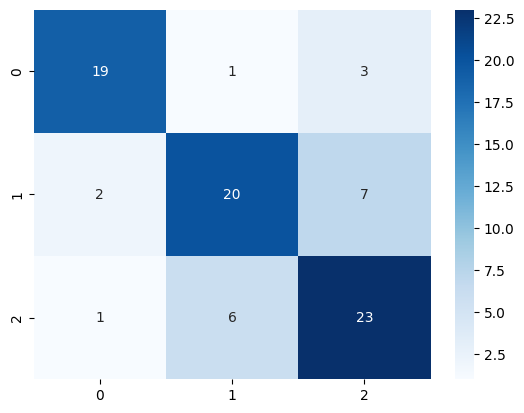

In [ ]:
result_forest = forest.predict(X_test)
exactitud_forest = accuracy_score(y_test,result_forest)
precision_forest = precision_score(y_test,result_forest,average = 'weighted')
f1_forest = f1_score(y_test,result_forest,average = 'weighted')
conf_mat_forest = confusion_matrix(y_test,result_forest)
print('exactitud bosque:{:.2f} %'.format(exactitud_forest*100))
print('precision bosque:{:.2f} %'.format(precision_forest*100))
print('puntaje f1 bosque:{:.2f} %'.format(f1_forest*100))
sns.heatmap(conf_mat_forest, annot = True, cmap='Blues', fmt='d')

In [ ]:
nombre = 'bosque_multiclase_5min.joblib'
joblib.dump(forest, nombre)

['bosque_multiclase_5min.joblib']